In [3]:
!pip3 install torch torchvision

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 66.7 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.1 MB/s  0:00:00
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [torchvision] [torchvision]


#📓 Laboratorio Sesión 2: Modelado e implementación de redes neuronales

> **Objetivo:** Implementar un Perceptrón Multicapa (MLP) utilizando PyTorch para resolver un problema de clasificación no lineal ("make_moons"), demostrando el poder de las funciones de activación y la profundidad.

---
## I. Configuración e Importaciones
#### 1.1 Importación de librerías esenciales

- Importamos todas las librerías que usaremos.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Usaremos matplotlib para la visualización del límite
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("Librerías importadas: PyTorch listo para Deep Learning.")

Librerías importadas: PyTorch listo para Deep Learning.


#### 1.1 Preparación de datos

In [6]:
# 1. Generar datos "Lunas"
X, y = make_moons(n_samples=400, noise=0.2, random_state=42)

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Convertir arrays de NumPy a tensores de PyTorch (el formato de DL)
# float32 para X (inputs) y float32 para y (targets) en PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # unsqueeze para que sea [N, 1]
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

print(f"Forma de X_train (Tensor): {X_train_tensor.shape}")
print(f"Forma de y_train (Tensor): {y_train_tensor.shape}")

Forma de X_train (Tensor): torch.Size([320, 2])
Forma de y_train (Tensor): torch.Size([320, 1])


## II. Definición de la arquitectura (MLP)
#### 2.1. Clase del Perceptrón Multicapa (MLP)

- Creamos una clase que define la estructura interna de la red (fully-connected).

In [7]:
class SimpleMLP(nn.Module): # hereda de nn.Module
    """
    MLP con 2 capas ocultas (Deep Neural Network simple) para resolver el problema no lineal.
    La red apila 32 Perceptrones (unidades) grandes, cada uno con una función no lineal.
    """
    def __init__(self, activation_fn):
        super(SimpleMLP, self).__init__()

        # 2 entradas (Feature 1, Feature 2) -> 32 neuronas en la 1ra capa oculta
        self.fc1 = nn.Linear(in_features=2, out_features=32)

        # 1ra capa oculta (32) -> 32 neuronas en la 2da capa oculta
        self.fc2 = nn.Linear(in_features=32, out_features=32)

        # 2da capa oculta (32) -> 1 salida (Clase 0 o 1)
        self.fc3 = nn.Linear(in_features=32, out_features=1)

        # La función de activación que se elegirá
        self.activation = activation_fn

    def forward(self, x): # se autoinicia por eso no se llama al forward
        # 1. Paso a través de la primera capa oculta + Activación
        x = self.fc1(x)
        x = self.activation(x)

        # 2. Paso a través de la segunda capa oculta + Activación
        x = self.fc2(x)
        x = self.activation(x)

        # 3. Paso a la capa de salida (sin activación final, se aplica en el loss)
        x = self.fc3(x)
        return x

## II. Entrenamiento del modelo (Sigmoide/Tanh)
- Comenzaremos con la activación clásica de curva S (Sigmoide/Tanh) para ver su capacidad.

### 3.1. Instancia, loss y optimizador

In [8]:
# Usaremos Tanh como nuestra primera función de activación (diferenciable, Slide 22)
# Ejecutar este bloque cada vez que queramos hacer reset de la red y volver entrenar
model_tanh = SimpleMLP(activation_fn=nn.Tanh())
loss_fn = nn.BCEWithLogitsLoss() # Combina Sigmoid y Binary Cross-Entropy
optimizer = optim.Adam(model_tanh.parameters(), lr=0.01)

print("Modelo Tanh y Optimizador Adam listos.")

Modelo Tanh y Optimizador Adam listos.


#### 3.2. Ciclo de entrenamiento

In [9]:
EPOCHS = 1000

for epoch in range(EPOCHS):
    # Propagación (Forward Pass): predicha = f(X)
    y_pred_logits = model_tanh(X_train_tensor)

    # Cálculo del error (Loss)
    loss = loss_fn(y_pred_logits, y_train_tensor)

    # Reiniciar gradientes
    optimizer.zero_grad()

    # Retropropagación (backward pass): calcula gradientes
    loss.backward()

    # Ajuste de pesos: actualiza W y b
    optimizer.step()

    if (epoch + 1) % 200 == 0:
        print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.4f}')

# Evaluación final
with torch.no_grad():
    y_logits_test = model_tanh(X_test_tensor)
    y_pred_test = torch.round(torch.sigmoid(y_logits_test))
    acc_tanh = accuracy_score(y_test, y_pred_test.numpy())

print(f"\nAccuracy con Tanh: {acc_tanh * 100:.2f}%")

Epoch 200/1000, Loss: 0.0608
Epoch 400/1000, Loss: 0.0484
Epoch 600/1000, Loss: 0.0420
Epoch 800/1000, Loss: 0.0346
Epoch 1000/1000, Loss: 0.0167

Accuracy con Tanh: 92.50%


## IV. Exploración: ReLU (Rectified Linear Unit)
- Demostremos la función de activación más actual.

#### 4.1. Entrenamiento con ReLU 🚀

In [15]:
# Instanciar un nuevo modelo usando ReLU (Slide 22)
model_relu = SimpleMLP(activation_fn=nn.ReLU())
optimizer_relu = optim.Adam(model_relu.parameters(), lr=0.01)

EPOCHS = 1000

# Bucle de entrenamiento para ReLU (mismo número de épocas para comparación)
for epoch in range(EPOCHS):
    y_pred_logits = model_relu(X_train_tensor)
    loss = loss_fn(y_pred_logits, y_train_tensor)

    optimizer_relu.zero_grad()
    loss.backward()
    optimizer_relu.step()

    # (Opcional: Imprimir el loss para ver si converge más rápido)
    if (epoch + 1) % 200 == 0:
        print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.4f}')

# Evaluación final con ReLU
with torch.no_grad():
    y_logits_test = model_relu(X_test_tensor)
    y_pred_test = torch.round(torch.sigmoid(y_logits_test))
    acc_relu = accuracy_score(y_test, y_pred_test.numpy())

print(f"Accuracy con ReLU: {acc_relu * 100:.2f}%")

Epoch 200/1000, Loss: 0.0462
Epoch 400/1000, Loss: 0.0357
Epoch 600/1000, Loss: 0.0245
Epoch 800/1000, Loss: 0.0191
Epoch 1000/1000, Loss: 0.0180
Accuracy con ReLU: 95.00%


#### 4.2. Visualización dellLímite de decisión no lineal

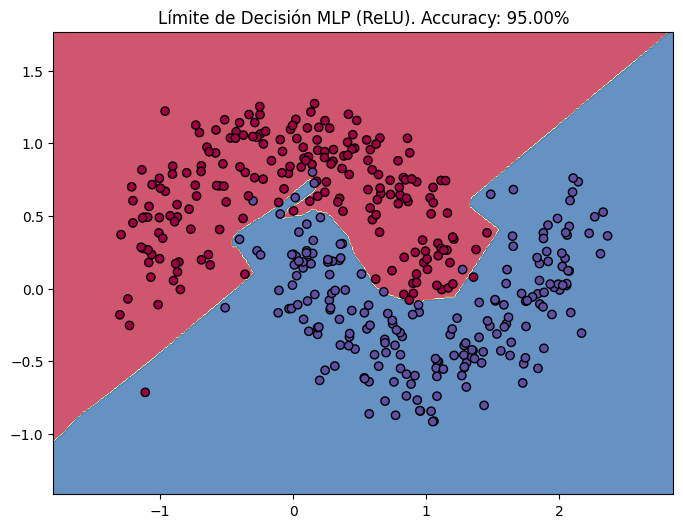


--- Resumen de Accuracies ---
MLP (Tanh): 92.50%
MLP (ReLU): 95.00%

La red ha aprendido la forma no lineal de los datos.


In [16]:
# Esta función es la que traza el límite curvo de forma general
def plot_decision_boundary(model, X, y, title):

    # 1. Crear la malla de puntos
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01 # Paso de la malla
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 2. Convertir malla a tensor y predecir
    mesh_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z_logits = model(mesh_tensor)
        Z = torch.round(torch.sigmoid(Z_logits)).numpy().reshape(xx.shape)

    # 3. Dibujar
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, marker='o', edgecolors='k')
    plt.title(title)
    plt.show()

# Usar la función para visualizar el resultado del modelo ReLU
plot_decision_boundary(
    model_relu,
    X,
    y,
    title=f"Límite de Decisión MLP (ReLU). Accuracy: {acc_relu*100:.2f}%"
)

# Comparación de accuracies
print("\n--- Resumen de Accuracies ---")
print(f"MLP (Tanh): {acc_tanh * 100:.2f}%")
print(f"MLP (ReLU): {acc_relu * 100:.2f}%")
print("\nLa red ha aprendido la forma no lineal de los datos.")

# 👩🏻‍💻✍🏻💡Evaluación formativa S2

## Ejercicio 1: Rediseñando el MLP a un DNN 🧠

**Objetivo**: Modificar la arquitectura existente para crear una Red Neuronal Profunda (DNN), consolidando la comprensión de las capas (`nn.Linear`) y la activación no lineal (`nn.ReLU`).

**Instrucción**: Modifique la clase SimpleMLP para crear una nueva clase llamada DeepMLP que cumpla con los siguientes requisitos:

1. **Profundidad**: Debe tener un total de tres capas ocultas (una capa de entrada, tres capas ocultas y una de salida).

2. **Ancho**: Aumente el número de neuronas en cada capa oculta de 32 a 64.

3. **Activación**: Use la activación ReLU en todas las capas ocultas.

Luego, instancie la nueva red, entrénela por 500 épocas, y muestre el Accuracy final.

In [ ]:
# --- CÓDIGO EJERCICIO 1 AQUÍ ---

class DeepMLP(nn.Module):
    # [IMPLEMENTAR CON TRES CAPAS OCULTAS DE 64 NEURONAS Y ReLU]

    def __init__(self, activation_fn):
        super(DeepMLP, self).__init__()
        
        # capa oculta 1
        self.fc1 = nn.Linear( in_features=2, out_features=64)

        # capa oculta 2
        self.fc2 = nn.Linear(in_features=64, out_features=64)

        # capa oculta 3
        self.fc3 = nn.Linear(in_features=64, out_features=64)

        # capa salida
        self.fc4 = nn.Linear(in_features=64, out_features=1)

        self.activation = activation_fn


    def forward(self, x):

        # paso a la capa oculta 1
        x = self.fc1(x)
        x = self.activation(x)
        
        #  paso a la capa oculta 2
        x = self.fc2(x)
        x = self.activation(x)
        
        # paso a la capa oculta 3
        x = self.fc3(x)
        x = self.activation(x)
        
        # Paso a la capa de salida (sin activación final, se aplica en el loss)
        x = self.fc4(x)
        return x


In [ ]:
# INSTANCIAR Y  DEFINIR OPTIMIZER

# Instanciar un nuevo modelo usando ReLU (Slide 22) 
model_mlp = DeepMLP(activation_fn=nn.ReLU()) #usando clase DeepMLP 
optimizer_mlp = optim.Adam(model_mlp.parameters(), lr=0.01)

In [37]:
#ENTRENAR POR 500 ÉPOCAS, EVALUAR Y MOSTRAR ACCURACY

EPOCHS = 500

# Bucle de entrenamiento para ReLU (mismo número de épocas para comparación)
for epoch in range(EPOCHS):
    y_pred_logits = model_mlp(X_train_tensor)
    loss = loss_fn(y_pred_logits, y_train_tensor)

    optimizer_mlp.zero_grad()
    loss.backward()
    optimizer_mlp.step()

    # (Opcional: Imprimir el loss para ver si converge más rápido)
    if (epoch + 1) % 200 == 0:
        print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.4f}')

# Evaluación final con ReLU
with torch.no_grad():
    y_logits_test = model_mlp(X_test_tensor)
    y_pred_test = torch.round(torch.sigmoid(y_logits_test))
    acc_mlp = accuracy_score(y_test, y_pred_test.numpy())

print(f"Accuracy con ReLU: {acc_mlp * 100:.2f}%")

Epoch 200/500, Loss: 0.0213
Epoch 400/500, Loss: 0.0145
Accuracy con ReLU: 92.50%


## Ejercicio 2: Comprensión con documentación 🧐📖

**Objetivo**: Fomentar el uso de la [documentación oficial de PyTorch](https://docs.pytorch.org/docs/stable/index.html) para comprender los módulos y parámetros utilizados en el laboratorio.

El módulo `nn.Linear` define la capa de pesos de nuestra red. Explique la diferencia conceptual entre los dos principales argumentos posicionales de la clase `nn.Linear` (es decir, `in_features` y `out_features`).

- `in_features` se refiere a:

- `out_features` se refiere a: